In [45]:
#Importing libraries for visualization, graphs, and modeling
import pandas as pd
import matplotlib.pyplot as plt
from collections import OrderedDict
from IPython.display import display
pd.options.display.max_columns = None

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

import warnings
from sklearn.metrics import f1_score, make_scorer, accuracy_score, classification_report

import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
import seaborn as sns
sns.set()
from pylab import *
from scipy import special, optimize
import sys
import os
sf1 = make_scorer(f1_score, greater_is_better=True, average = 'weighted')
sa = make_scorer(accuracy_score, greater_is_better=True)

In [2]:
#Download datasets
train=pd.read_csv('/Users/LindseyTakeuchi/Downloads/train.csv')
test=pd.read_csv('/Users/LindseyTakeuchi/Downloads/test.csv')
target = train['Target']
train = train.drop(['Id', 'idhogar'], axis=1)
test = test.drop(['Id', 'idhogar'], axis=1)

#Data Loading and Description

In [3]:
#Basic descriptive data
train.head()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,190000.0,0,3,0,1,1,0,NaN,0,1,1,0,0,0,0,1,1,1,1,10,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,no,10,no,10.0,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,8,12,no,12.0,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,NaN,0,8,0,1,1,0,NaN,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,8,no,11,11.0,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,9,1.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2,2,0,4,yes,11,no,11.0,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,NaN,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0,4,yes,11,no,11.0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [4]:
train.describe()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,hogar_nin,hogar_adul,hogar_mayor,hogar_total,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
count,2.697000e+03,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,2215.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,1629.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.00000,9557.000000,9557.000000,9557.0,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9552.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.00000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9552.000000,9557.000000,9557.000000
mean,1.652316e+05,0.038087,4.955530,0.023648,0.994768,0.957623,0.231767,1.404063,0.385895,1.559171,1.945066,0.399184,1.661714,2.060898,0.785079,3.220885,4.005964,3.999058,4.094590,7.200272,0.459791,3.999058,0.594015,0.077744,0.188030,0.008580,0.115622,0.013079,0.001465,0.001465,0.692791,0.222873,0.000942,0.001046,0.016428,0.065920,0.970074,0.017683,0.003139,0.002197,0.677409,0.964738,0.031705,0.003558,0.885110,0.000314,0.002197,0.110809,0.003872,0.213979,0.764257,0.015381,0.002511,0.001883,0.489589,0.458407,0.050120,0.882704,0.03003,0.084545,0.001465,0.0,0.001256,0.102438,0.327404,0.570158,0.128388,0.288061,0.583551,0.101078,0.252799,0.646123,0.057549,0.483415,0.516585,0.137805,0.123260,0.268390,0.031914,0.062781,0.033169,0.342681,0.311081,0.184054,0.381814,0.012138,0.009522,0.051167,0.010045,0.002407,0.013289,0.003139,0.012661,0.008685,1.406613,2.592445,0.284085,3.999058,9.231523,0.134666,0.170556,0.207701,0.185414,0.112692,0.017893,0.015591,0.139793,0.015381,2.739981,1.605380,0.61850,0.1

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 141 entries, v2a1 to Target
dtypes: float64(8), int64(130), object(3)
memory usage: 10.3+ MB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Columns: 140 entries, v2a1 to agesq
dtypes: float64(8), int64(129), object(3)
memory usage: 25.5+ MB


It looks like there are 9557 observations, including several data points per household. 
It has 130 int, 8 num, and 5 obj columns. Test set has one less column because it doesn't have a Target column. Let's check out the object columns. 

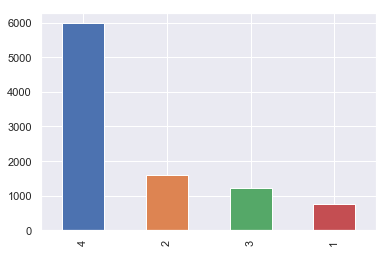

In [7]:
# lets bar plot to see the frequencies of targets
train['Target'].value_counts().plot.bar()

Text(0.5, 1.0, '# of Unique Values in Integer Columns')

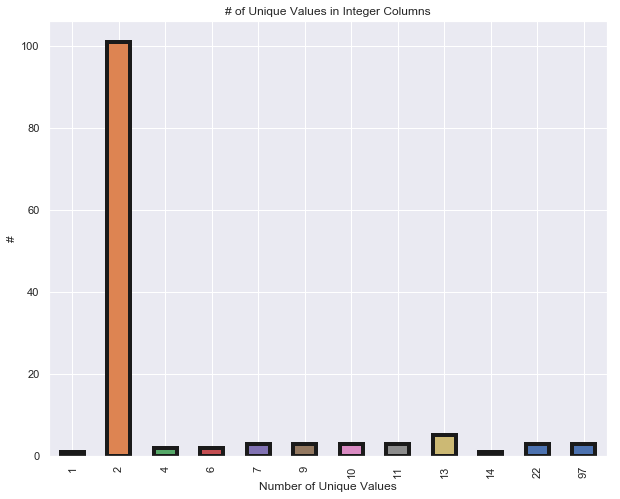

In [8]:
train.select_dtypes(np.int64).nunique().value_counts().sort_index().plot.bar(edgecolor = 'k',figsize=(10,8), linewidth=4)
plt.xlabel('Number of Unique Values'); plt.ylabel('#');
plt.title('# of Unique Values in Integer Columns')

#Data Cleaning

Let's start with cleaning up variables that have missing values

In [9]:
test['Target'] = np.nan

In [10]:
train.isnull().sum().sort_values(ascending=False).head()

rez_esc      7928
v18q1        7342
v2a1         6860
meaneduc        5
SQBmeaned       5
dtype: int64

In [11]:
train.columns[train.dtypes==object]

Index(['dependency', 'edjefe', 'edjefa'], dtype='object')

Id - a unique identifier for each row

idhogar - this is a unique identifier for each household

dependency - dependency rate

edjefe - years of education of male head of household

edjefa - years of education of female head of household

In [12]:
train.select_dtypes('float64').head()

,v2a1,v18q1,rez_esc,meaneduc,overcrowding,SQBovercrowding,SQBdependency,SQBmeaned
0,190000.0,NaN,NaN,10.0,1.000000,1.000000,0.0,100.0
1,135000.0,1.0,NaN,12.0,1.000000,1.000000,64.0,144.0
2,NaN,NaN,NaN,11.0,0.500000,0.250000,64.0,121.0
3,180000.0,1.0,1.0,11.0,1.333333,1.777778,1.0,121.0
4,180000.0,1.0,NaN,11.0,1.333333,1.777778,1.0,121.0


v2a1 - Monthly rent payment

v18q1 - # of tablets household owns

rez_esc - Years behind in school

meaneduc - mean education for adults

overcrowding - # persons per room

SQBovercrowding - overcrowding^2

SQBmeaned - mean years of education of adults^2

In [13]:
#Let's find out how many missing values we have
missing = pd.DataFrame(train.isnull().sum()).rename(columns = {0: 'total'})
#Create a table 
missing['percent'] = missing['total'] / len(train)
missing.sort_values('percent', ascending = False).head()

,total,percent
rez_esc,7928,0.829549
v18q1,7342,0.768233
v2a1,6860,0.717798
SQBmeaned,5,0.000523
meaneduc,5,0.000523


In [14]:
train["rez_esc"] = train["rez_esc"].fillna(0)
train["v18q1"] = train["v18q1"].fillna(0)
train['v2a1'] = train['v2a1'].fillna(0)
train["SQBmeaned"] = train["SQBmeaned"].fillna(0)
train["meaneduc"] = train["meaneduc"].fillna(0)

test["rez_esc"] = test["rez_esc"].fillna(0)
test["v18q1"] = test["v18q1"].fillna(0)
test['v2a1'] = test['v2a1'].fillna(0)
test["SQBmeaned"] = test["SQBmeaned"].fillna(0)
test["meaneduc"] = test["meaneduc"].fillna(0)

train.drop(columns = 'dependency', inplace=True)
test.drop(columns = 'dependency', inplace=True)
train.drop(columns = 'edjefe', inplace=True)
train.drop(columns = 'edjefa', inplace=True)
test.drop(columns = 'edjefe', inplace=True)
test.drop(columns = 'edjefa', inplace=True)

In [15]:
#Double check on missing values
missing = pd.DataFrame(train.isnull().sum()).rename(columns = {0: 'total'})
missing['percent'] = missing['total'] / len(train)
missing.sort_values('percent', ascending = False).head()

,total,percent
v2a1,0,0.0
hogar_nin,0,0.0
parentesco7,0,0.0
parentesco8,0,0.0
parentesco9,0,0.0


Great, let's see the correlations using a heatmap.

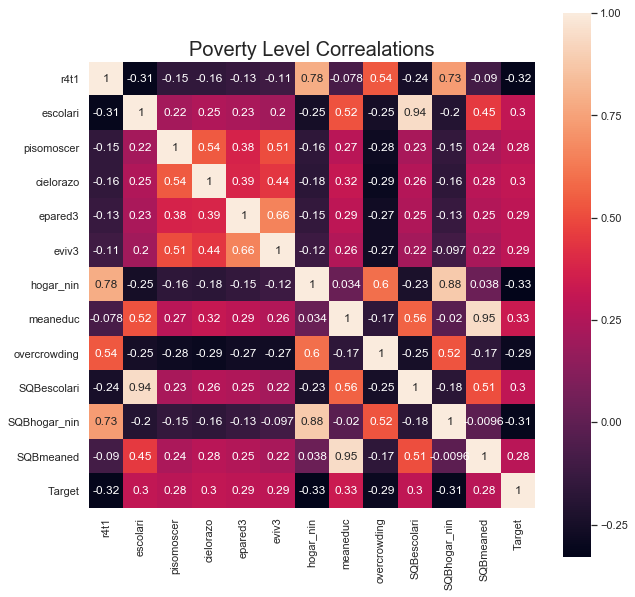

In [16]:
correlations = train.corr()
TargetCorr = correlations.index[abs(correlations['Target'])>.275]
f, ax=plt.subplots(figsize=(10,10))
sns.set(font_scale=1)
plt.title('Poverty Level Correalations', fontsize=20);
sns.heatmap(train[TargetCorr].corr(), square=True, annot=True);

In [17]:
corr = train.corr()
corr.sort_values(["Target"], ascending = False, inplace = True)
print(corr.Target)

Target             1.000000
meaneduc           0.333932
cielorazo          0.304421
escolari           0.302305
SQBescolari        0.296577
eviv3              0.294222
epared3            0.292451
pisomoscer         0.280284
SQBmeaned          0.276102
paredblolad        0.261274
etecho3            0.257378
SQBedjefe          0.246368
v18q               0.238864
rooms              0.226208
instlevel8         0.214351
v18q1              0.201754
qmobilephone       0.199707
computer           0.183113
lugar1             0.173359
bedrooms           0.166943
v2a1               0.166942
hogar_adul         0.160133
elimbasu1          0.160051
television         0.157065
energcocinar2      0.156457
tipovivi2          0.143891
estadocivil3       0.129730
refrig             0.126792
age                0.117620
mobilephone        0.106421
                     ...   
estadocivil1      -0.135651
hacapo            -0.138008
etecho2           -0.139205
elimbasu3         -0.140924
SQBhogar_total    -0

/Users/LindseyTakeuchi/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


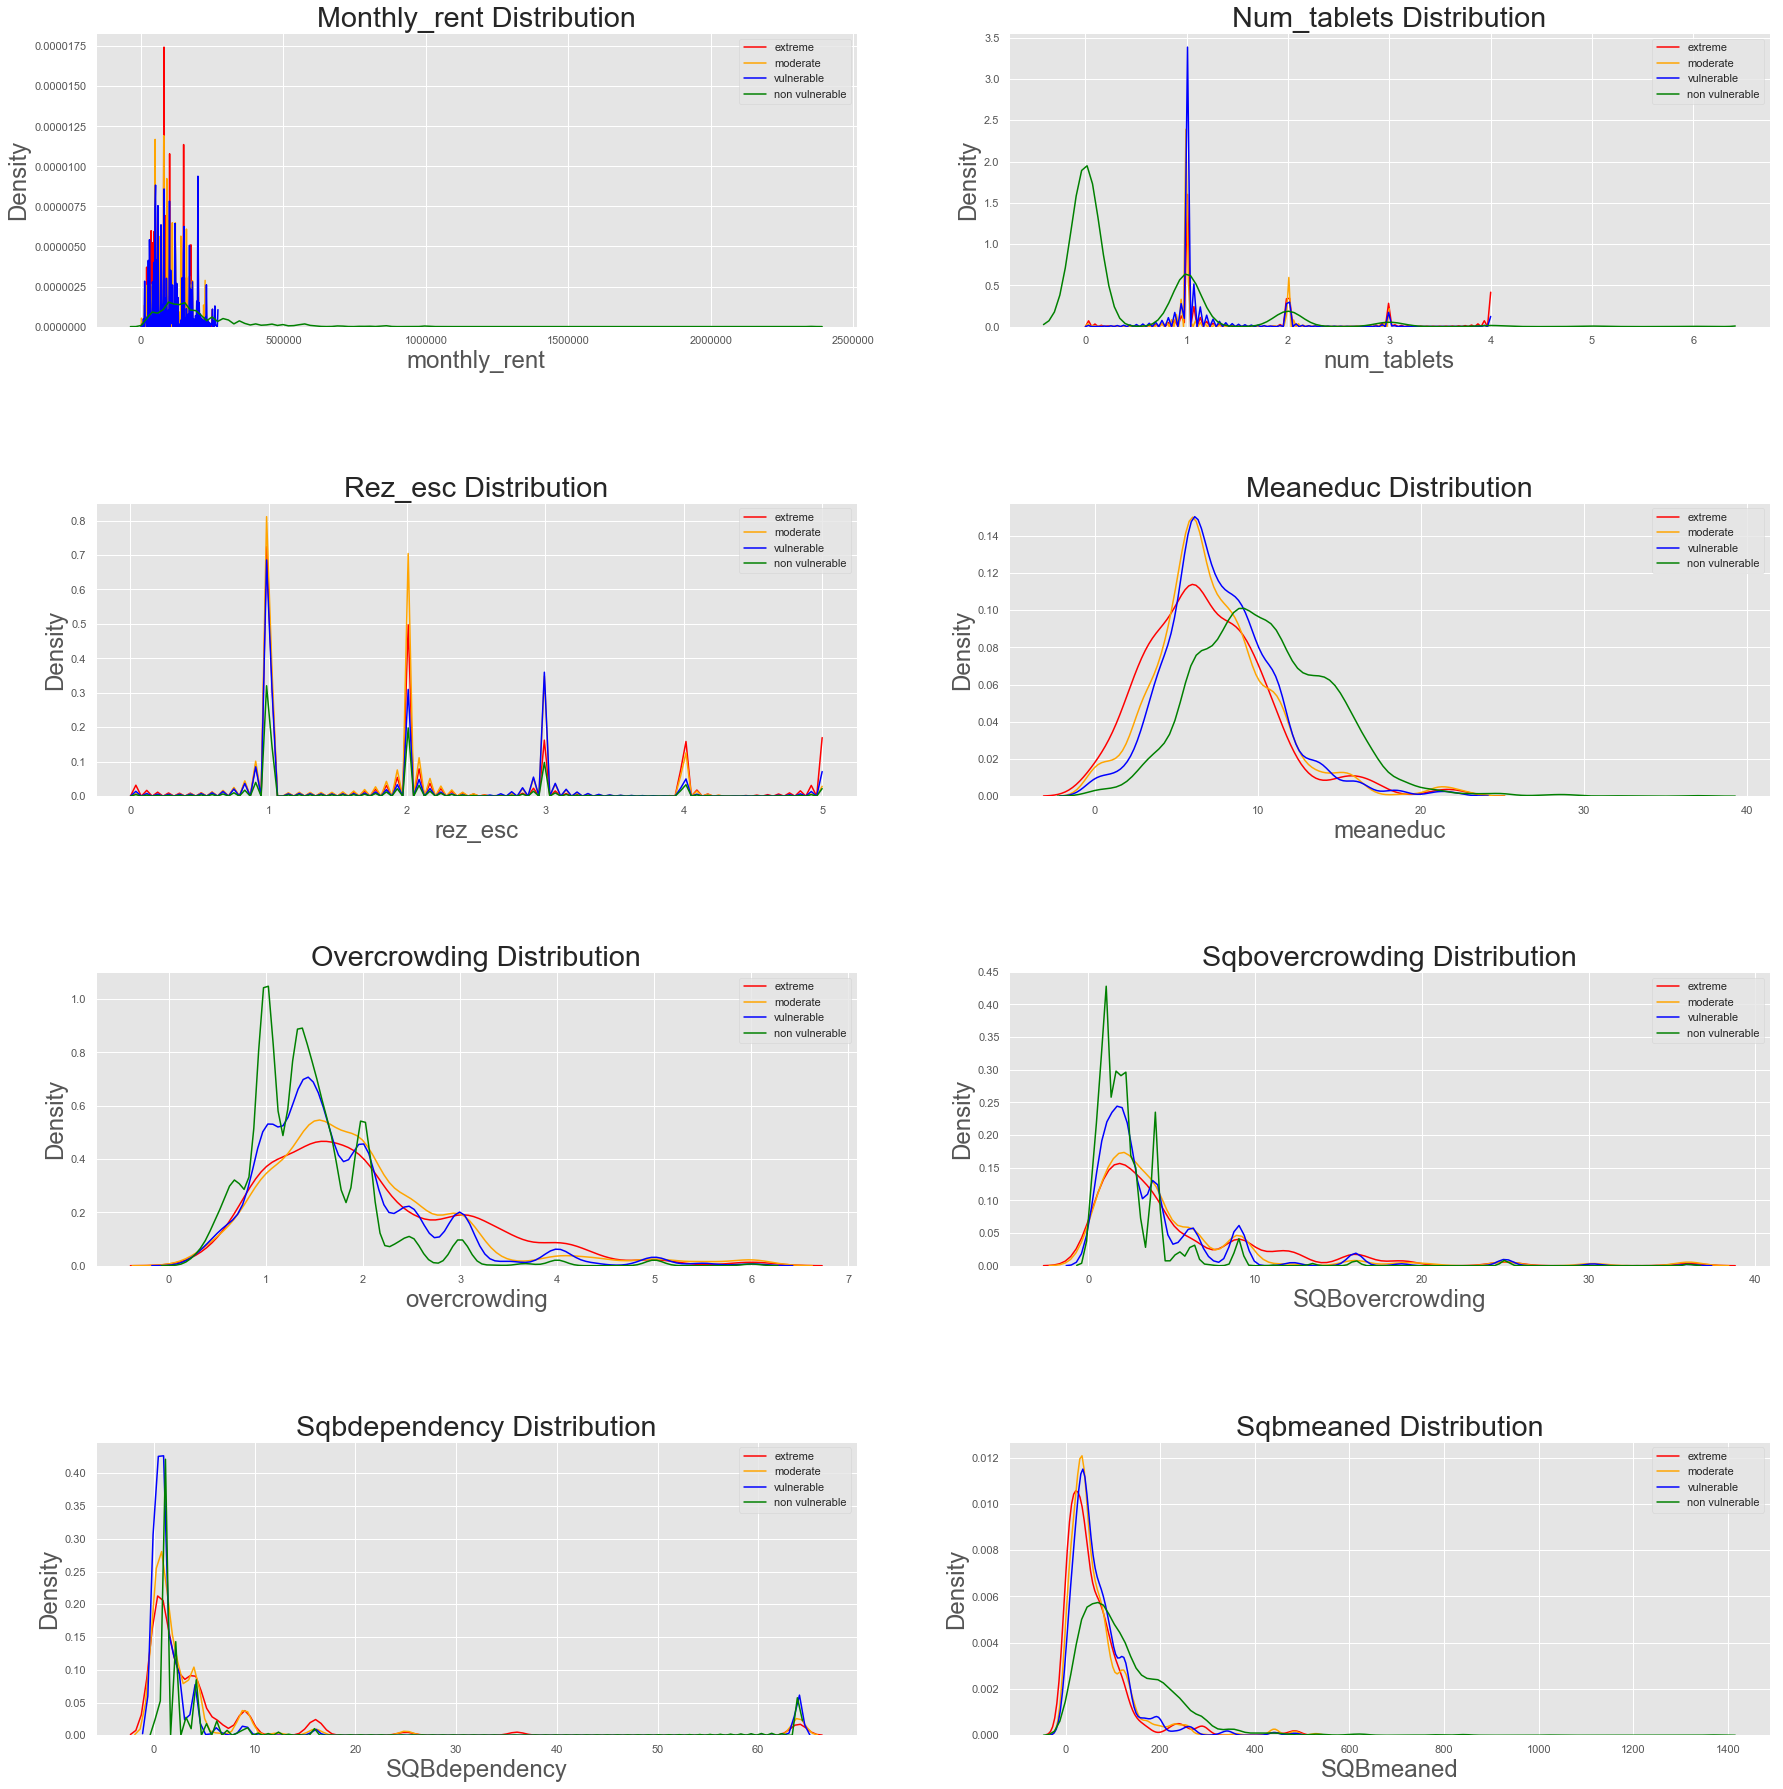

In [18]:
#Visualizing the distribution of binary variables. Using this code from a kernel because it was pretty advanced.
plt.figure(figsize = (30, 30))
plt.style.use('ggplot')
train.rename(columns={'v2a1': 'monthly_rent', 'v18q1': 'num_tablets'}, inplace=True)

colors = OrderedDict({1: 'red', 2: 'orange', 3: 'blue', 4: 'green'})
poverty_mapping = OrderedDict({1: 'extreme', 2: 'moderate', 3: 'vulnerable', 4: 'non vulnerable'})
plt.rcParams.update({'font.size': 20})

#Take care float columns
for i, col in enumerate(train.select_dtypes('float')):
    ax = plt.subplot(9, 2, i + 1)
    #Poverty levels
    for poverty_level, color in colors.items():
        # Plotting each poverty level as a separate line
        sns.kdeplot(train.loc[train['Target'] == poverty_level, col].dropna(), 
                    ax = ax, color = color, label = poverty_mapping[poverty_level])
    plt.title(f'{col.capitalize()} Distribution'); plt.xlabel(f'{col}'); plt.ylabel('Density')

plt.subplots_adjust(top = 2)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=.6)

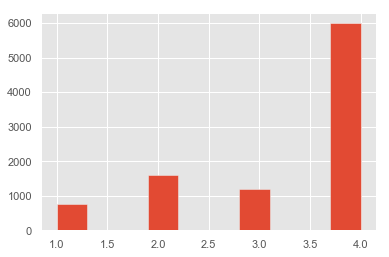

In [19]:
train['Target'].hist()

In [20]:
train_undersampled=train.drop(train.query('Target == 4').sample(frac=.75).index)

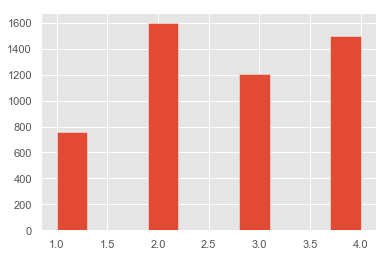

In [21]:
train_undersampled['Target'].hist()

In [22]:
x=train_undersampled
y=train_undersampled['Target']

#Modeling

Let's try Random Forest and Gradient Booster

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [25]:
clf = RandomForestClassifier()
params={'n_estimators': list(range(40,61, 1))}
gs = GridSearchCV(clf, params, cv=5)

In [26]:
gs.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [27]:
pred=gs.predict(x_test)

In [28]:
x_test = x_test.fillna(x_train.mean())

In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       0.99      0.95      0.97       144
           2       0.98      0.99      0.99       314
           3       0.99      0.99      0.99       252
           4       0.99      0.99      0.99       302

   micro avg       0.99      0.99      0.99      1012
   macro avg       0.99      0.98      0.98      1012
weighted avg       0.99      0.99      0.99      1012



In [30]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, pred))

[[137   7   0   0]
 [  1 312   0   1]
 [  0   0 249   3]
 [  0   0   2 300]]


In [31]:
print(gs.best_params_)
print(gs.best_score_)
print(gs.best_estimator_)

{'n_estimators': 53}
0.983201581027668
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=53, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [40]:
cvres = gs.cv_results_
print (cvres)

{'mean_fit_time': array([0.26895733, 0.23302445, 0.2391252 , 0.23428607, 0.24858513,
       0.23860373, 0.24325438, 0.25155902, 0.25109658, 0.26322079,
       0.27594538, 0.28647733, 0.29544883, 0.27882757, 0.27808852,
       0.28893309, 0.32014461, 0.31490254, 0.2998311 , 0.31104116,
       0.31814847]), 'std_fit_time': array([0.0896224 , 0.00737499, 0.0081662 , 0.0111898 , 0.00254339,
       0.0108633 , 0.0120301 , 0.00557672, 0.00990512, 0.00575256,
       0.01264482, 0.00490963, 0.00781085, 0.00336604, 0.00921717,
       0.0090765 , 0.02382779, 0.0073564 , 0.00736183, 0.01368487,
       0.00947102]), 'mean_score_time': array([0.01929126, 0.01376219, 0.01366315, 0.0140481 , 0.01523643,
       0.01324387, 0.01307697, 0.01373   , 0.01625309, 0.01446238,
       0.01491699, 0.01500206, 0.01739707, 0.01682663, 0.0148478 ,
       0.01503372, 0.01689434, 0.01752057, 0.01654606, 0.01601882,
       0.0164206 ]), 'std_score_time': array([0.010874  , 0.00245706, 0.00176798, 0.00257725, 0.00137

In [41]:
print("\nClassification Report:")
print(classification_report(y_test, gs.predict(x_test)))


Classification Report:
              precision    recall  f1-score   support

           1       0.99      0.95      0.97       144
           2       0.98      0.99      0.99       314
           3       0.99      0.99      0.99       252
           4       0.99      0.99      0.99       302

   micro avg       0.99      0.99      0.99      1012
   macro avg       0.99      0.98      0.98      1012
weighted avg       0.99      0.99      0.99      1012



Let's see if Gradient Boosting does gives a better result. The downside of Random Forest is that it only takes independent votes for the best model while GB models at the same time. 

In [47]:
clf = GradientBoostingClassifier(n_estimators= 1000)
param_dictionary = {"learning_rate": [0.3], 'max_depth': [1,2]}
gs = GridSearchCV(clf, param_dictionary, verbose=3, scoring=sa)
gs.fit(x_train, y_train)

/Users/LindseyTakeuchi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] learning_rate=0.3, max_depth=1 ..................................
[CV] ........ learning_rate=0.3, max_depth=1, score=1.0, total=   6.1s
[CV] learning_rate=0.3, max_depth=1 ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.1s remaining:    0.0s


[CV] ........ learning_rate=0.3, max_depth=1, score=1.0, total=   6.2s
[CV] learning_rate=0.3, max_depth=1 ..................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   12.3s remaining:    0.0s


[CV] ........ learning_rate=0.3, max_depth=1, score=1.0, total=   5.3s
[CV] learning_rate=0.3, max_depth=2 ..................................
[CV] ........ learning_rate=0.3, max_depth=2, score=1.0, total=   5.0s
[CV] learning_rate=0.3, max_depth=2 ..................................
[CV] ........ learning_rate=0.3, max_depth=2, score=1.0, total=   6.2s
[CV] learning_rate=0.3, max_depth=2 ..................................
[CV] ........ learning_rate=0.3, max_depth=2, score=1.0, total=   6.1s


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   35.2s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'learning_rate': [0.3], 'max_depth': [1, 2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(accuracy_score), verbose=3)

In [48]:
clf.fit(x_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=1000,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [50]:
gs.best_params_

{'learning_rate': 0.3, 'max_depth': 1}

In [51]:
clf = GradientBoostingClassifier(n_estimators= 500, learning_rate= 0.3, max_depth= 1)

In [53]:
clf.fit(x_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.3, loss='deviance', max_depth=1,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=500,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [54]:
clf.score(x_test, y_test)

1.0

In [55]:
clf = GradientBoostingClassifier(n_estimators= 500, learning_rate= 0.3, max_depth= 4)

In [56]:
clf.fit(x_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.3, loss='deviance', max_depth=4,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=500,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [57]:
clf.score(x_test, y_test)

1.0

In [71]:
print(gs.best_params_)
print(gs.best_score_)
print(gs.best_estimator_)

{'learning_rate': 0.3, 'max_depth': 1}
1.0
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.3, loss='deviance', max_depth=1,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=1000,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)


In [72]:
print("\nClassification Report:")
print(classification_report(y_test, gs.predict(x_test)))


Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       144
           2       1.00      1.00      1.00       314
           3       1.00      1.00      1.00       252
           4       1.00      1.00      1.00       302

   micro avg       1.00      1.00      1.00      1012
   macro avg       1.00      1.00      1.00      1012
weighted avg       1.00      1.00      1.00      1012



My modeling method seems to be wrong because I was expecting a score in the .95-.99 range. I don't see why it should be 1. 

In [73]:
clf.fit(x_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.3, loss='deviance', max_depth=4,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=500,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [75]:
clf.score(x_test, y_test)

1.0

I was expecting the Gradient Booster to give a more accurate result than the Random Forest Model, however my modeling methodologies have skewed the scores. I'll have to further explore my data cleaning and modeling methods to produce a better model using these two models. This is as far as I can get under the time restraints. 